<a href="https://colab.research.google.com/github/markuskunej/air-pollution-thesis/blob/master/VARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
DATA_PATH = "/content/Y&E_60m_last40days"
!unzip "/content/Y&E_60m_last40days.zip"

Archive:  /content/Y&E_60m_last40days.zip
  inflating: Y&E_60m_last40days/AQI.csv  
  inflating: Y&E_60m_last40days/CO.csv  
  inflating: Y&E_60m_last40days/CO2.csv  
  inflating: Y&E_60m_last40days/Elevation.csv  
  inflating: Y&E_60m_last40days/Humidity.csv  
  inflating: Y&E_60m_last40days/Latitude.csv  
  inflating: Y&E_60m_last40days/Longitude.csv  
  inflating: Y&E_60m_last40days/NO.csv  
  inflating: Y&E_60m_last40days/NO2.csv  
  inflating: Y&E_60m_last40days/Noise_LEQ.csv  
  inflating: Y&E_60m_last40days/Noise_Max.csv  
  inflating: Y&E_60m_last40days/O3.csv  
  inflating: Y&E_60m_last40days/PM1.csv  
  inflating: Y&E_60m_last40days/PM10.csv  
  inflating: Y&E_60m_last40days/PM2.5.csv  
  inflating: Y&E_60m_last40days/Pressure.csv  
  inflating: Y&E_60m_last40days/Temperature.csv  
  inflating: Y&E_60m_last40days/Wind_Direction.csv  
  inflating: Y&E_60m_last40days/Wind_Gust.csv  
  inflating: Y&E_60m_last40days/Wind_Speed.csv  


In [13]:
import pandas as pd
import os
import glob

DATA_PATH = "/content/Y&E_60m_last40days"
print(os.path.join(DATA_PATH , "/*.csv"))
all_files = glob.glob('/content/Y&E_60m_last40days/*.csv')
keys = []
dfs = []
big_df = []
for file_name in all_files:
  df = pd.read_csv(file_name, parse_dates=["Time"])
  variable_name = os.path.basename(file_name).split(".")[0]
  df[variable_name] = df.mean(axis=1)
  #keys.append(variable_name)
  df.set_index('Time', inplace=True)
  df.info()
  df = df.tz_localize(tz='US/Eastern', ambiguous='infer')
  df.info()
  print(df[df.index.duplicated(keep=False)])

  # reduce dataframe columns to only the average
  df = df[[variable_name]]

  print(df.index)
  dfs.append(df)

# concat dataframes into one
big_df = pd.concat(dfs, axis=1)
print(big_df.shape)
print(big_df.head())

/*.csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 962 entries, 2022-10-09 11:00:00 to 2022-11-18 10:29:45
Data columns (total 11 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   PM1 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}  962 non-null    float64
 1   PM1 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}  962 non-null    float64
 2   PM1 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}  962 non-null    float64
 3   PM1 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}  962 non-null    float64
 4   PM1 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}  962 non-null    float64
 5   PM1 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}  962 non-null    float64
 6   PM1 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}  962 non-null    float64
 7   PM1 {DeviceID="AirSENCE-1021C65A40214", name="Pollutan

<ipython-input-13-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[variable_name] = df.mean(axis=1)
<ipython-input-13-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[variable_name] = df.mean(axis=1)
<ipython-input-13-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[variable_name] = df.mean(axis=1)
<ipython-input-13-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[variable_name] = df.mean(axis=1)
<ipython-input-13-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 962 entries, 2022-10-09 11:00:00-04:00 to 2022-11-18 10:16:24-05:00
Data columns (total 11 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   NO {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}  962 non-null    float64
 1   NO {DeviceID="AirSENCE-032206C140232", name="Pollutant"}  962 non-null    float64
 2   NO {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}  962 non-null    float64
 3   NO {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}  962 non-null    float64
 4   NO {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}  962 non-null    float64
 5   NO {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}  962 non-null    float64
 6   NO {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}  962 non-null    float64
 7   NO {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}  

<ipython-input-13-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[variable_name] = df.mean(axis=1)
<ipython-input-13-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[variable_name] = df.mean(axis=1)
<ipython-input-13-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[variable_name] = df.mean(axis=1)
<ipython-input-13-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[variable_name] = df.mean(axis=1)
<ipython-input-13-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 962 entries, 2022-10-09 11:00:00 to 2022-11-18 10:20:23
Data columns (total 11 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Noise_LEQ {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}  962 non-null    float64
 1   Noise_LEQ {DeviceID="AirSENCE-032206C140232", name="Pollutant"}  962 non-null    float64
 2   Noise_LEQ {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}  962 non-null    float64
 3   Noise_LEQ {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}  962 non-null    float64
 4   Noise_LEQ {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}  962 non-null    float64
 5   Noise_LEQ {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}  962 non-null    float64
 6   Noise_LEQ {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}  962 non-null    float64
 7   Noise_L

<ipython-input-13-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[variable_name] = df.mean(axis=1)
<ipython-input-13-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[variable_name] = df.mean(axis=1)
<ipython-input-13-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[variable_name] = df.mean(axis=1)
<ipython-input-13-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[variable_name] = df.mean(axis=1)
<ipython-input-13-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

In [14]:
#see how many nan values exist now
print(big_df.isnull().sum())

# delete rows from beginning and end that contain NaN values (since date range for each variable is not the same)

# drop nan rows from beginning
while(big_df.iloc[0].isnull().values.any() == True):
  big_df.drop(index=big_df.index[0], axis=0, inplace=True)

#drop nan rows from end
while(big_df.iloc[-1].isnull().values.any() == True):
  big_df.drop(index=big_df.index[-1], axis=0, inplace=True)

#see how many nan values exist after slicing the beginning and end of dataframe
print(big_df.isnull().sum())


PM1               21
CO2               21
AQI               21
Latitude          21
Humidity          21
Wind_Gust         21
NO                21
Wind_Direction    21
Noise_Max         21
Elevation         21
PM10              21
NO2               21
Pressure          21
CO                21
Noise_LEQ         21
O3                21
Wind_Speed        21
PM2               21
Temperature       21
Longitude         21
dtype: int64
PM1               0
CO2               0
AQI               0
Latitude          0
Humidity          0
Wind_Gust         0
NO                0
Wind_Direction    0
Noise_Max         0
Elevation         0
PM10              0
NO2               0
Pressure          0
CO                0
Noise_LEQ         0
O3                0
Wind_Speed        0
PM2               0
Temperature       0
Longitude         0
dtype: int64


Plot Current Data

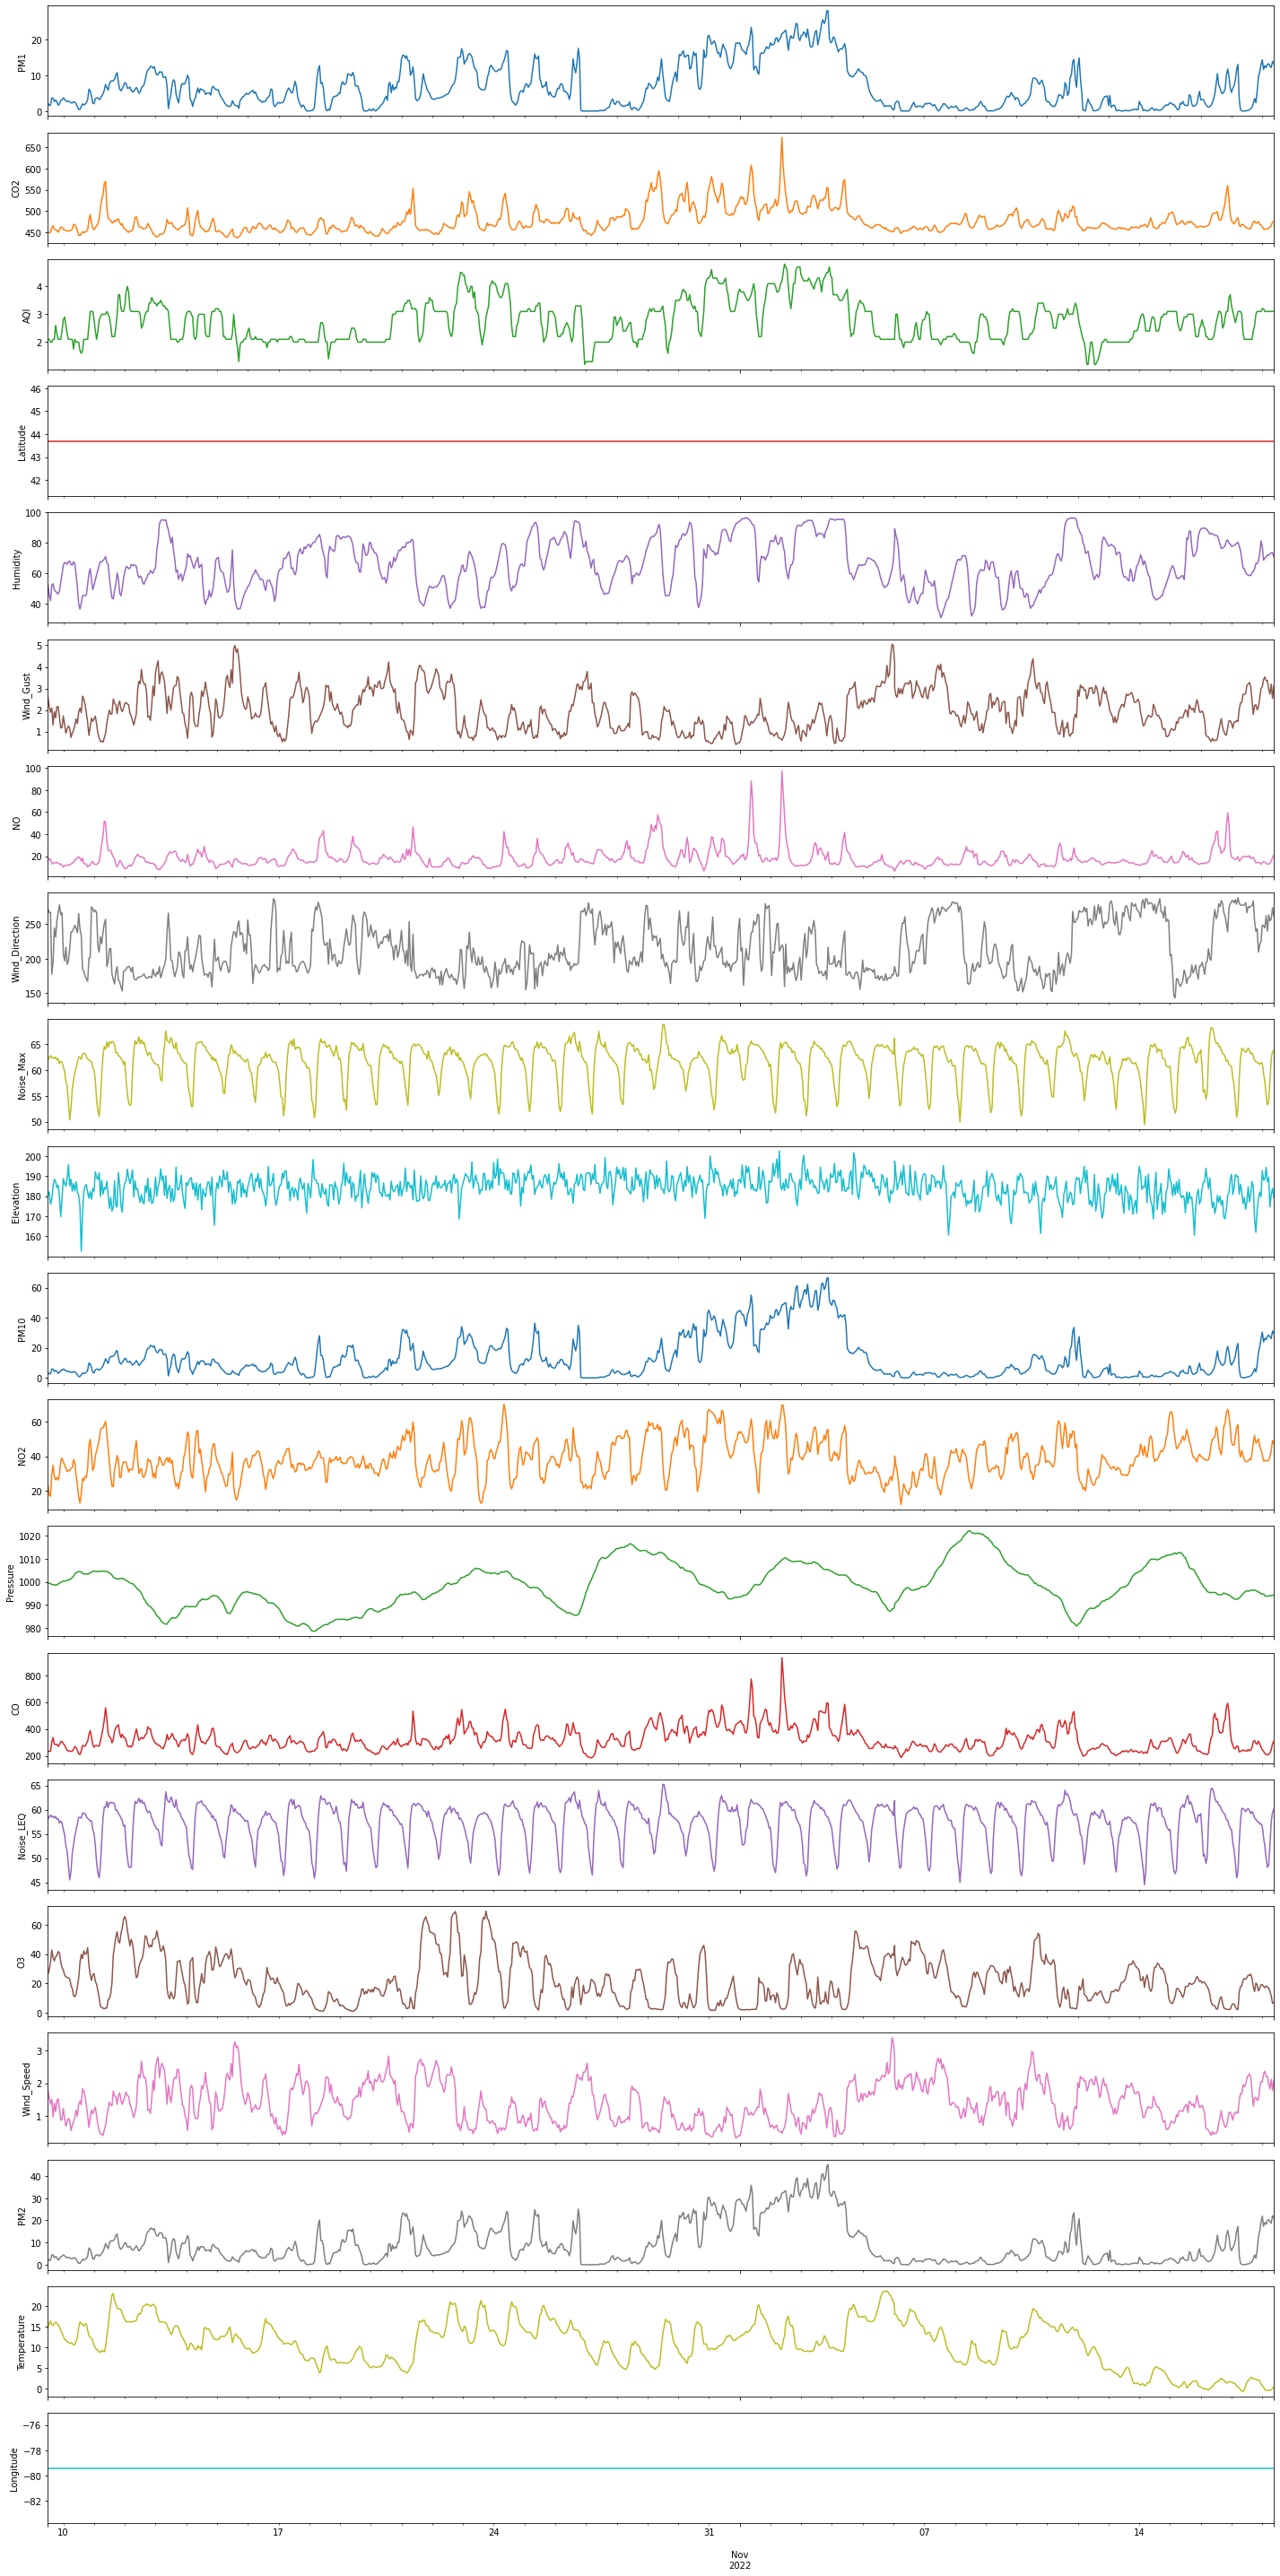

In [15]:
import matplotlib.pyplot as plt

plot_cols = big_df.columns

fig,ax = plt.subplots(len(plot_cols), figsize=(20,40), sharex=True)
big_df.plot(subplots=True, legend=False, ax=ax)
for a in range(len(ax)): 
    ax[a].set_ylabel(plot_cols[a])
ax[-1].set_xlabel('')
plt.tight_layout()
plt.show()

Remove unhelpful variables

In [16]:
# based on the graphs, remove latitude and longitude.
# Also remove AQI since this number is determined based on pollutant levels (which we already have)
big_df.drop(['AQI', 'Latitude', 'Longitude', 'Elevation'], axis=1, inplace=True)

Augmented Dickey-Fuller Test

In [17]:
# test for stationarity, difference if seasonality exists
# https://michael-fuchs-python.netlify.app/2020/10/29/time-series-analysis-regression-extension-techniques-for-forecasting-multivariate-variables/#stationarity
from statsmodels.tsa.stattools import adfuller

def Augmented_Dickey_Fuller_Test_func(timeseries , column_name):
    '''
    Calculates statistical values whether the available data are stationary or not 
    
    Args:
        series (float64): Values of the column for which stationarity is to be checked, numpy array of floats 
        column_name (str): Name of the column for which stationarity is to be checked
    
    Returns:
        p-value that indicates whether the data are stationary or not
    ''' 
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    adfTest = adfuller(timeseries, autolag='AIC')   # why AIC vs BIC, t-stat, etc.?
    dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
    for key, value in adfTest[4].items():
       dfResults['Critical Value (%s)'%key] = value
    print (dfResults)
    if adfTest[1] <= 0.05:
        print()
        print("Conclusion:")
        print("Reject the null hypothesis")
        print('\033[92m' + "Data is stationary" + '\033[0m')
    else:
        print()
        print("Conclusion:")
        print("Fail to reject the null hypothesis")
        print('\033[91m' + "Data is non-stationary" + '\033[0m')


# Check each column for seasonality
for name, column in big_df.iteritems():
    Augmented_Dickey_Fuller_Test_func(big_df[name],name)
    print('\n')



Results of Dickey-Fuller Test for column: PM1
ADF Test Statistic       -4.336355
P-Value                   0.000384
# Lags Used               2.000000
# Observations Used     956.000000
Critical Value (1%)      -3.437209
Critical Value (5%)      -2.864568
Critical Value (10%)     -2.568382
dtype: float64

Conclusion:
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: CO2
ADF Test Statistic       -2.171756
P-Value                   0.216656
# Lags Used              21.000000
# Observations Used     937.000000
Critical Value (1%)      -3.437348
Critical Value (5%)      -2.864630
Critical Value (10%)     -2.568415
dtype: float64

Conclusion:
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: Humidity
ADF Test Statistic       -3.174058
P-Value                   0.021536
# Lags Used              22.000000
# Observations Used     936.000000
Critical Value (1%)      -3.437356
Critical Value (5%)      -2.

Since not all variables are stationary, we must perform co-integration test (apparently I could have skipped the dickey-fuller test?)

In [32]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen   #can't use on more than 12 variables

johansenResults = coint_johansen(big_df.iloc[:,:12],-1,1)

print("Trace Stat:")
print(johansenResults.trace_stat)
print("\nTrace Stat Crit Vals:")
print(johansenResults.trace_stat_crit_vals)
print("\nMax Eig stat:")
print(johansenResults.max_eig_stat)
print("\nMax Eig Stat Crit Vals:")
print(johansenResults.max_eig_stat_crit_vals)


Trace Stat:
[1.64609880e+03 1.15238866e+03 8.76874040e+02 6.70199339e+02
 4.87043210e+02 3.52885748e+02 2.50053617e+02 1.61378398e+02
 9.95746630e+01 5.33180103e+01 1.66163757e+01 2.08895286e-04]

Trace Stat Crit Vals:
[[302.9054 311.1288 326.9716]
 [255.6732 263.2603 277.9962]
 [212.4721 219.4051 232.8291]
 [173.2292 179.5199 191.8122]
 [137.9954 143.6691 154.7977]
 [106.7351 111.7797 121.7375]
 [ 79.5329  83.9383  92.7136]
 [ 56.2839  60.0627  67.6367]
 [ 37.0339  40.1749  46.5716]
 [ 21.7781  24.2761  29.5147]
 [ 10.4741  12.3212  16.364 ]
 [  2.9762   4.1296   6.9406]]

Max Eig stat:
[4.93710141e+02 2.75514619e+02 2.06674700e+02 1.83156130e+02
 1.34157462e+02 1.02832131e+02 8.86752192e+01 6.18037348e+01
 4.62566527e+01 3.67016347e+01 1.66161668e+01 2.08895286e-04]

Max Eig Stat Crit Vals:
[[69.6513 73.0946 80.0937]
 [63.7248 67.0756 73.8856]
 [57.7954 61.0404 67.6415]
 [51.8528 54.9629 61.3449]
 [45.893  48.8795 55.0335]
 [39.9085 42.7679 48.6606]
 [33.9271 36.6301 42.2333]
 [27.91

Granger Causality Test

In [ ]:
#https://blogs.sap.com/2021/05/06/a-multivariate-time-series-modeling-and-forecasting-guide-with-python-machine-learning-client-for-sap-hana/
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np

variables = big_df.columns
matrix = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
for col in matrix.columns:
    for row in matrix.index:
        test_result = grangercausalitytests(big_df[[row, col]], maxlag=20, verbose=False)            
        p_values = [round(test_result[i+1][0]['ssr_chi2test'][1],4) for i in range(maxlag)]            
        min_p_value = np.min(p_values)
        matrix.loc[row, col] = min_p_value
matrix.columns = [var + '_x' for var in variables]
matrix.index = [var + '_y' for var in variables]
print(matrix)